In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

In [29]:
# Load data
df = pd.read_csv('/content/dataset_edit.csv')
df

,id_umkm,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
0,28828567,UD. Alif Pamungkas,Kesehatan,1,56,5497149,3347794,Tokopedia,479,Belum Terdaftar,2015,-2149355,171000000,479
1,28828568,UD. Zidanar Panji,Perdagangan,5,44,7398384,39969661,Bukalapak,464,Terdaftar,2014,32571277,147000000,464
2,28828569,UD. Winda Jayengprana,unknown,74,51,8881762,25253355,Website Sendiri,383,Belum Terdaftar,2000,16371593,375000000,383
3,28828570,UD. Damaris Satria,Jasa,89,5,9576178,20700389,Website Sendiri,986,Belum Terdaftar,2003,11124211,282000000,986
4,28828571,UD. Qasya Wiratama,Jasa,91,59,9456853,4820810,Lazada,314,Belum Terdaftar,2002,-4636043,450000000,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,288222126,UD. Syana Ilir Rian,Jasa,62,63,6854562,48239150,Website Sendiri,162,Belum Terdaftar,2003,41384588,375000000,162
13560,288222127,UD. Bela Widhi,Pendidikan,70,50,804787,35210634,Website Sendiri,180,Terdaftar,2012,34405847,360000000,180
13561,288222128,UD. Bayu Alam,Kesehatan,50,37,8211715,8874364,Lazada,802,Terdaftar,2009,662649,261000000,802
13562,288222129,UD. Olla Sudharmo Udin,Pendidikan,11,NaN,6217989,41510653,Website Sendiri,122,Belum Terdaftar,2009,35292664,132000000,122


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_umkm                 13467 non-null  object
 1   nama_usaha              13564 non-null  object
 2   jenis_usaha             13467 non-null  object
 3   tenaga_kerja_perempuan  13444 non-null  object
 4   tenaga_kerja_laki_laki  13462 non-null  object
 5   aset                    13453 non-null  object
 6   omset                   13451 non-null  object
 7   marketplace             13447 non-null  object
 8   kapasitas_produksi      13442 non-null  object
 9   status_legalitas        13470 non-null  object
 10  tahun_berdiri           13469 non-null  object
 11  laba                    13452 non-null  object
 12  biaya_karyawan          13469 non-null  object
 13  jumlah_pelanggan        13453 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


karena type data dari semua variabel object maka harus diubah ke integer untuk variabel numerik

In [31]:
# Define numeric and categorical columns
kolom_numerik = ['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset',
                 'kapasitas_produksi', 'laba', 'biaya_karyawan', 'jumlah_pelanggan', 'tahun_berdiri']
kolom_kategorik = ['nama_usaha', 'jenis_usaha', 'marketplace', 'status_legalitas']

In [32]:
for col in kolom_numerik:
    if col in df.columns: # Memastikan kolom ada di DataFrame sebelum konversi
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_umkm                 13467 non-null  object 
 1   nama_usaha              13564 non-null  object 
 2   jenis_usaha             13467 non-null  object 
 3   tenaga_kerja_perempuan  13408 non-null  float64
 4   tenaga_kerja_laki_laki  13429 non-null  float64
 5   aset                    13422 non-null  float64
 6   omset                   13423 non-null  float64
 7   marketplace             13447 non-null  object 
 8   kapasitas_produksi      13400 non-null  float64
 9   status_legalitas        13470 non-null  object 
 10  tahun_berdiri           13436 non-null  float64
 11  laba                    13407 non-null  float64
 12  biaya_karyawan          13430 non-null  float64
 13  jumlah_pelanggan        13412 non-null  float64
dtypes: float64(9), object(5)
memory usage:

cek missing value

In [33]:
df.isnull().sum()

,0
id_umkm,97
nama_usaha,0
jenis_usaha,97
tenaga_kerja_perempuan,156
tenaga_kerja_laki_laki,135
aset,142
omset,141
marketplace,117
kapasitas_produksi,164
status_legalitas,94


In [34]:
# prompt: tampilkan unique value dari setiap kolom

# Menampilkan nilai unik dari setiap kolom
for col in df.columns:
  print(f"Unique values for column '{col}':")
  print(df[col].unique())
  print("-" * 30)

Unique values for column 'id_umkm':
['28828567' '28828568' '28828569' ... '288222128' '288222129' '288222130']
------------------------------
Unique values for column 'nama_usaha':
['UD. Alif Pamungkas' 'UD. Zidanar Panji' 'UD. Winda Jayengprana' ...
 'UD. Bayu Alam' 'UD. Olla Sudharmo Udin' 'UD. Qasya Kencana']
------------------------------
Unique values for column 'jenis_usaha':
['Kesehatan' 'Perdagangan' 'unknown' 'Jasa' 'Pendidikan' nan 'Fashion'
 'Makanan & Minuman' 'Perusahaan']
------------------------------
Unique values for column 'tenaga_kerja_perempuan':
[ 1.  5. 74. 89. 91. 76. 37. 75. 82. 17. 18. 27. 11. 95. 51. 86. 99. 57.
 93. 21. 44. 61. 41. 66.  8. 63. 14. 29. 25. 68. 94. 53. 78. 52. 98. 33.
 81. 13. 87. 12. 55. 71. 65. 62. 90. 28. 22. 35. 84.  6. 31. 15.  9. 58.
 79.  0. 69. 96.  4. 80. 24. 34. 38. 45. 36. 59. 30. 32. 83. 85. 60. 70.
 77. 19. 56. 88. 48. 97. 67. 64. 39. 23.  2. 16. 43.  3. 46. nan 92. 47.
 20. 26. 40. 50. 49. 54. 73. 42. 10.  7. 72.]
----------------

In [35]:
# Replace 'Unknown', 'unknown', '-' with NaN in categorical columns
for col in kolom_kategorik:
    if col in df.columns:
        df[col] = df[col].replace(['Unknown', 'unknown', '-'], np.nan)

In [36]:

# Hitung persentase missing value
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPersentase Missing Values:")
missing_percentage


Persentase Missing Values:


,0
id_umkm,0.715128
nama_usaha,0.000000
jenis_usaha,0.965792
tenaga_kerja_perempuan,1.150103
tenaga_kerja_laki_laki,0.995282
aset,1.046889
omset,1.039516
marketplace,1.127986
kapasitas_produksi,1.209083
status_legalitas,0.958419


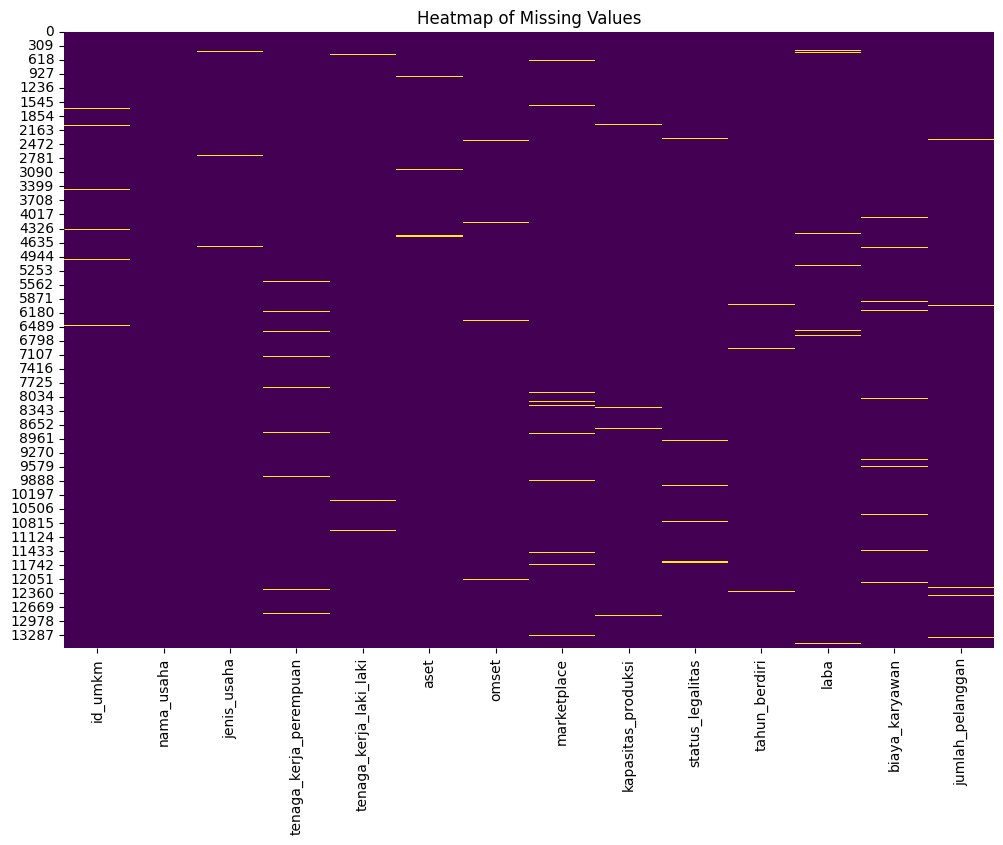

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [38]:
# KNN Imputation for numeric columns
if kolom_numerik:
    scaler = StandardScaler()
    df_numeric = df[kolom_numerik].copy()
    df_numeric_scaled = scaler.fit_transform(df_numeric)
    imputer = KNNImputer(n_neighbors=5, weights='uniform')
    df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric_scaled), columns=kolom_numerik)
    df_numeric_imputed = pd.DataFrame(scaler.inverse_transform(df_numeric_imputed), columns=kolom_numerik)
    df[kolom_numerik] = df_numeric_imputed
    print("\nFilled missing values in numeric columns using KNNImputer")

# Impute categorical columns with mode
for col in kolom_kategorik:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0] if col != 'marketplace' else 'Tidak Ada', inplace=True)
        print(f"Filled missing values in '{col}' with {'mode' if col != 'marketplace' else 'Tidak Ada'}")


Filled missing values in numeric columns using KNNImputer
Filled missing values in 'jenis_usaha' with mode
Filled missing values in 'marketplace' with Tidak Ada
Filled missing values in 'status_legalitas' with mode


<ipython-input-38-155d3316577b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0] if col != 'marketplace' else 'Tidak Ada', inplace=True)


In [39]:
if 'id_umkm' in df.columns:
  df = df.drop('id_umkm', axis=1)

print("\nDataFrame setelah menghapus kolom 'id_umkm':")
df


DataFrame setelah menghapus kolom 'id_umkm':


,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
0,UD. Alif Pamungkas,Kesehatan,1.0,56.0,5497149.0,3347794.0,Tokopedia,479.0,Belum Terdaftar,2015.0,-2149355.0,171000000.0,479.0
1,UD. Zidanar Panji,Perdagangan,5.0,44.0,7398384.0,39969661.0,Bukalapak,464.0,Terdaftar,2014.0,32571277.0,147000000.0,464.0
2,UD. Winda Jayengprana,Jasa,74.0,51.0,8881762.0,25253355.0,Website Sendiri,383.0,Belum Terdaftar,2000.0,16371593.0,375000000.0,383.0
3,UD. Damaris Satria,Jasa,89.0,5.0,9576178.0,20700389.0,Website Sendiri,986.0,Belum Terdaftar,2003.0,11124211.0,282000000.0,986.0
4,UD. Qasya Wiratama,Jasa,91.0,59.0,9456853.0,4820810.0,Lazada,314.0,Belum Terdaftar,2002.0,-4636043.0,450000000.0,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,UD. Syana Ilir Rian,Jasa,62.0,63.0,6854562.0,48239150.0,Website Sendiri,162.0,Belum Terdaftar,2003.0,41384588.0,375000000.0,162.0
13560,UD. Bela Widhi,Pendidikan,70.0,50.0,804787.0,35210634.0,Website Sendiri,180.0,Terdaftar,2012.0,34405847.0,360000000.0,180.0
13561,UD. Bayu Alam,Kesehatan,50.0,37.0,8211715.0,8874364.0,Lazada,802.0,Terdaftar,2009.0,662649.0,261000000.0,802.0
13562,UD. Olla Sudharmo Udin,Pendidikan,11.0,38.6,6217989.0,41510653.0,Website Sendiri,122.0,Belum Terdaftar,2009.0,35292664.0,132000000.0,122.0


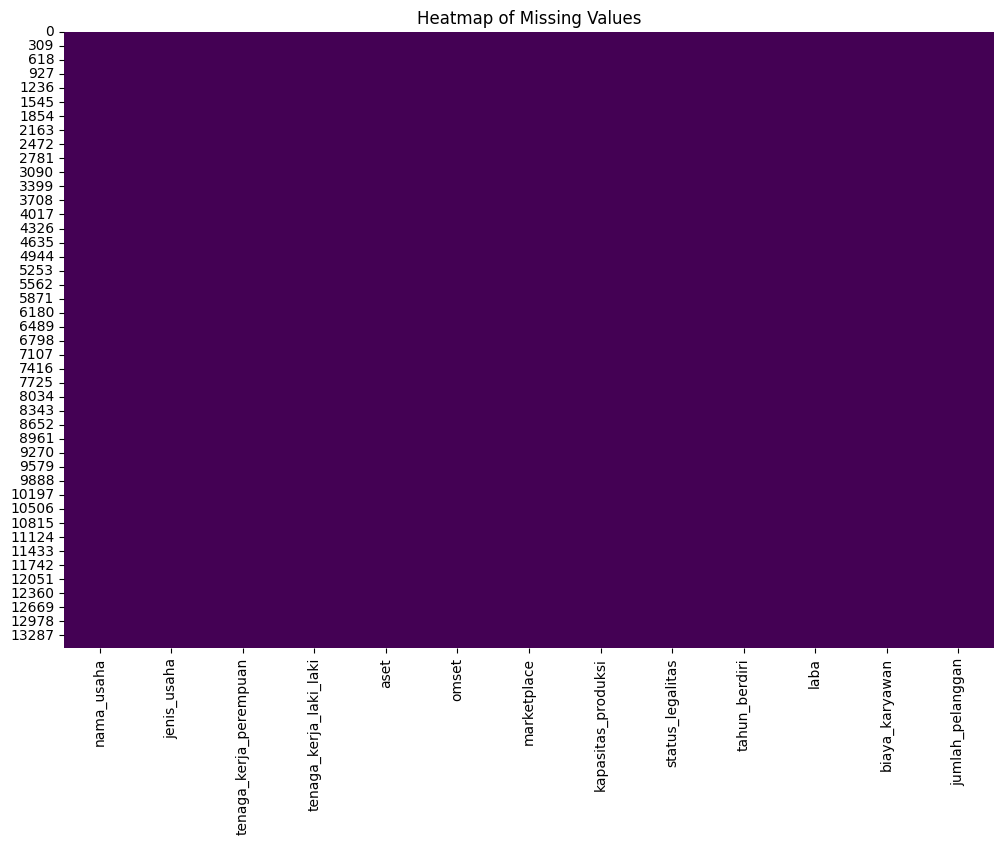

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [41]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('data_bersih.csv', index=False)

print("\nData bersih telah disimpan ke dalam file 'data_bersih.csv'")



Data bersih telah disimpan ke dalam file 'data_bersih.csv'
